# NLP Exploration with DistilBERT

In [2]:
# 1️⃣ Install required libraries 
!pip install transformers torch matplotlib seaborn --quiet

In [4]:
# 2️⃣ Import necessary libraries
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Set default device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


<h3>Step 1: Load DistilBERT for Text Classification</h3>

In [6]:
!pip install ipywidgets

# Load pre-trained DistilBERT tokenizer and model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"  # Fine-tuned for sentiment analysis
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name).to(device)

print(f"Loaded model: {model_name}")

Defaulting to user installation because normal site-packages is not writeable
Loaded model: distilbert-base-uncased-finetuned-sst-2-english


<h3>Step 2: Create a Classification Pipeline</h3>

In [7]:
# Hugging Face pipeline 
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0 if device=="cuda" else -1)

Device set to use cpu


<h3>Step 3: Test Model on Sample Text</h3>

In [8]:
# Sample sentences
texts = [
    "I love programming in Python. It makes me feel productive!",
    "I'm feeling very sad today. Nothing seems right.",
    "The movie was okay, but it could have been better."
]

results = classifier(texts)

# Print humanized output
for text, res in zip(texts, results):
    print(f"Text: {text}")
    print(f"Predicted sentiment: {res['label']} with score {res['score']:.2f}\n")

Text: I love programming in Python. It makes me feel productive!
Predicted sentiment: POSITIVE with score 1.00

Text: I'm feeling very sad today. Nothing seems right.
Predicted sentiment: NEGATIVE with score 1.00

Text: The movie was okay, but it could have been better.
Predicted sentiment: NEGATIVE with score 0.99



<h3>Step 4: Visualization of Predictions</h3>

C:\Users\thris\AppData\Local\Temp\ipykernel_20248\254411219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette="viridis")


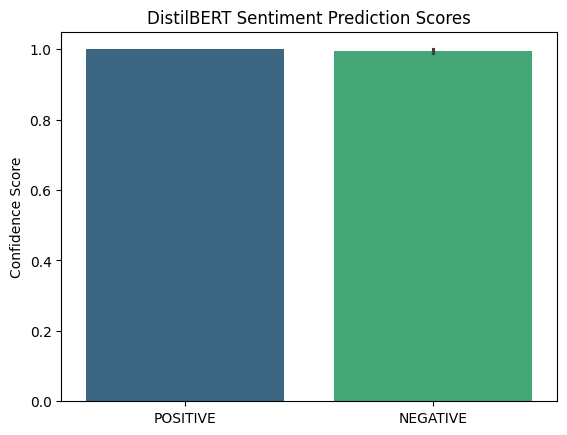

In [9]:
# Extract labels and scores
labels = [res['label'] for res in results]
scores = [res['score'] for res in results]

sns.barplot(x=labels, y=scores, palette="viridis")
plt.title("DistilBERT Sentiment Prediction Scores")
plt.ylabel("Confidence Score")
plt.show()

<h3>Step 5: Q&A using DistilBERT</h3>

In [11]:
!pip install ipywidgets
from transformers import pipeline

qa_model_name = "distilbert-base-uncased-distilled-squad"
qa_pipeline = pipeline("question-answering", model=qa_model_name, tokenizer=qa_model_name, device=0 if device=="cuda" else -1)

context = """Narendra Modi is the Prime Minister of India. He has been serving since 2014 and belongs to the Bharatiya Janata Party (BJP)."""

qa_inputs = {
    "question": "Who is the Prime Minister of India?",
    "context": context
}

answer = qa_pipeline(qa_inputs)
print(f"Question: {qa_inputs['question']}")
print(f"Answer: {answer['answer']}")

Defaulting to user installation because normal site-packages is not writeable


Device set to use cpu


Question: Who is the Prime Minister of India?
Answer: Narendra Modi


<h3>Step 6: Text Embeddings</h3>

In [12]:
from transformers import DistilBertModel

# Load base model for embeddings
embedding_model = DistilBertModel.from_pretrained("distilbert-base-uncased").to(device)

def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = embedding_model(**inputs)
    # Take the [CLS] token embedding
    return outputs.last_hidden_state[:,0,:].cpu().numpy()

emb1 = get_embedding("I love programming in Python.")
emb2 = get_embedding("Python coding is my favorite hobby.")

print("Embedding shape:", emb1.shape)

Embedding shape: (1, 768)


<h3>Step 7: Ideas for Notebook Analysis & Exploration</h3>

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
sim_score = cosine_similarity(emb1, emb2)[0][0]
print("Similarity between sentences:", sim_score)

Similarity between sentences: 0.9737158
